# Cours d'informatique TSI1

- [Architecture d'un ordinateur](#architecture)
- [Représentation des nombres](#representation)
- [Algorithmique et programmation](#algorithmique)
- [Méthodes numériques](#methodes_numeriques)

<a id='architecture'></a>
## Architecture d'un ordinateurs

Un ordinateur est une machine électronique qui execute un ensemble d'opérations arithmétiques sur des données. Les opérations sont définies dans le programme exécuté par l'ordinateur et les données sont stockées dans la mémoire de l'ordinateur.

Aujourd'hui un grand nombre d'appareils électroniques sont (ou contiennent) des ordinateurs : ordinateurs, téléphones, tablettes, voitures, montres, ...

Un ordinateur contient généralement les éléments suivants :

- Une source d'énergie (secteur, batterie) ;

![IMG-Energie](images/IMG-batterie.jpg)

- Un microprocesseur qui est le composant qui execute les instructions et effectue les opérations ;

![IMG-Processeur](images/IMG-processeur.jpg)

- Une mémoire vive rapide qui n'est pas retenue lorsque l'alimentation est coupée (mémoire RAM);

![IMG-Ram](images/IMG-ram.jpg)

- Une mémoire de masse plus lente qui peut retenir l'information sans alimentation électrique (disque dur, mémoire flash, ...) ;

![IMG-DD](images/IMG-disquedur.jpg) ![IMG-Energie](images/IMG-sd.jpg)

- Des périphériques d'entrée sortie pour communiquer avec le monde extérieur ;

![IMG-Clavier](images/IMG-clavier.jpg) ![IMG-Ecran](images/IMG-ecran.jpg)

- Des ports de communication pour connecter d'autres appareils électroniques (autres ordinateurs).

![IMG-Usb](images/IMG-usb.jpg)


> **Exercice : **
>
>Dans quel type de mémoire est stocké un texte en train d'être tappé dans un logiciel de traitement de texte s'il n'a pas encore été enregistré ? S'il a été enregistré ? 


<a id='representation'></a>
## Représentation des nombres

Dans un ordinateur, toutes les données (textes, images, sons, vidéos, ...) sont stockées sous forme de nombres. L'électronique et les mémoires des ordinateurs codent les nombres en base 2 (binaire) c'est à dire que les seuls chiffres utilisés sont 0 et 1.

### Représentation des nombres entiers

Dans la représentation habituelle en base 10 d'un nombre, chaque chiffre du nombre représente une puissance de 10. Par exemple $345 = 3\times10^2 + 4\times 10^2 + 5\times 10^0$.

En binaire c'est la même chose sauf que chaque chiffre d'un nombre représente une puissance de 2. Par exempe le nombre binaire $1011_2 = 1\times 2^3 + 0\times 2^2 + 1\times 2^1 + 1\times 2^0 = 8+2+1 = 11_{10}$ (L'indice indique la base dans laquelle est écrit le nombre). 

> **Exercice** 
> Convertir les nombres binaires suivants en notation décimale*: $11101$, $10101$, $1000$.

In [5]:
print(0b11101, ",", 0b10101,",", 0b1000)

29 , 21 , 8


Pour convertir un nombre de la base 10 vers la base 2, il faut faire des divisions euclidiennes successives par 2 et noter les restes de droite à gauche. Par exemple pour convertir $18_{10}$ en base 2 on effectue les divisions suivantes :
- $18/2 = 9$ reste $0$
- $9/2 = 4$ reste $1$
- $4/2 = 2$ reste $0$
- $2/2 = 1$ reste $0$
- $1/2 = 0$ reste $1$

Et donc : $18_{10}$  = $10010_2$

> **Exercice** : Convertir les nombres décimaux suivants en binaire : 24, 41, 100, 10

In [6]:
print(bin(24),",",bin(41),",",bin(100),",",bin(10))

0b11000 , 0b101001 , 0b1100100 , 0b1010


Chaque chiffre d'un nombre binaire s'appelle un *bit* (**b**inary dig**it**). Il arrive très souvent que le nombre de bits utilisés pour représenter les nombres entiers dans un ordinateur soit fixe. Généralement 32 bits ou 64 bits dans les ordinateurs. Dans ces conditions il existe un nombre entier maximum représentable, qui vaut 

In [7]:
print(2**32-1)

4294967295


en 32 bits, et

In [8]:
print(2**64-1)

18446744073709551615


en 64 bits. 

Lorsque l'on veut représenter des nombres entiers relatifs (signés), le premier bit est utilisé pour coder le signe du nombre ($1$ pour un nombre négatif et $0$ pour un nombre positif).

### Représentation des nombres décimaux

Pour représenter un nombre décimal dans un ordinateur on utilise la *virgule flottante*. Un nombre $r$ est représenté par un signe $s$ ($1$ ou $-1$), une mantisse $m$ et un exposant $e$ et on a $r=smb^e$ où $b$ est la base de représentation, souvent $2$.

On pourrait utiliser un nombre de bits quelconque pour $m$ et $e$ mais pour faciliter la réutilisation de programmes une norme (IEEE 754) a été fixée :

| Précision | Encodage | *S*igne | *E*xposant | *M*antisse | Valeur d'un nombre | Précision | Chiffres significatifs |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Simple précision | 32 bits | 1 bit | 8 bits | 23 bits | $(-1)^S \times M \times 2^{(E-127)}$ | 24 bits | environ 7 |
| Double précision | 64 bits | 1 bit | 11 bits | 52 bits | $(-1)^S \times M \times 2^{(E-1023)}$ | 53 bits | environ 16|


In [9]:
print("32 bits")
print("Mantisse la plus élevée : ", 2**23-1); 
print("Chiffres significatifs : ", len(str(2**23-1))); 
print("Nombre le plus grand : ",'{:e}'.format((2**23-1)*2**128))

32 bits
Mantisse la plus élevée :  8388607
Chiffres significatifs :  7
Nombre le plus grand :  2.854495e+45


In [10]:
# On utilise la bibliothèque math pour la fonction log
from math import *
print("64 bits")
print("Mantisse la plus élevée : ", 2**52-1); 
print("Chiffres significatifs : ", len(str(2**52-1))); 
print("Nombre le plus grand, environ : {: f}".format(log10((2**52-1)*2**1024)));
print(10**0.908)

64 bits
Mantisse la plus élevée :  4503599627370495
Chiffres significatifs :  16
Nombre le plus grand, environ :  323.908275
8.090958991783824


Le problème de ce type de représentation est que beaucoup de nombres décimaux ont une représentation infinie en virgule flottante et on fera inévitablement des erreurs d'arrondi. Par exemple :

In [11]:
print(0.1+0.2)
print(0.1+0.2-0.3==0)

0.30000000000000004
False


Ce qui provoque comme on vient de le voir un problème si l'on veut comparer des nombres en virgule flottante. Dans ce cas on n'utilise pas de comparaison stricte avec ```==``` mais on compare si les deux nombres sont *assez proches* l'un de l'autre. Par exemple :

In [12]:
a=0.3 ; b=0.1+0.2 ; eps=1e-10
print(a==b)
print(abs(a-b)<eps)

False
True


On vérifie que ```a``` et ```b``` sont égaux à $10^{-10}$ près.

<a id='algorithmique'></a>
## Algorithmique et programmation

- [Algorithme](#algo)
- [Données](#donnees)
    - [Nombres](#nombres)
    - [Chaines de caractères](#chainess)
    - [Listes](#listes)
- [Instructions élémentaires](#instructions)
- [Fonctions](#fonctions)
- [Fichiers](#fichiers)
- [Analyse d'un algorithme](#analyse)

<a id='algo'></a>
### Algorithme

Un algorithme correspond à une suite d'*instructions simples* qui décrivent ce que le programme doit faire pour résoudre un problème donnée. On peut assimiler un algorithme à une recette de cuisine qui donne les étapes successives pour réaliser un plat.

Il faut noter que la définition d'*instruction simple* n'est pas universelle et dépend du langage de programmation utilisé. Certains langage dits de *haut niveau* comprennent des instructions bien plus compliquées que d'autres de *bas niveau*. De la même manière qu'une recette de cuisine écrite pour un grand chef ne sera probablement pas compréhensible par un cuisinier du dimanche ! (combien parmi vous savent ce qu'il faut faire lorsqu'une recette de croissants indique *puis on donne trois tours au paton ainsi obtenu* ?)

Le langage Python que nous allons utiliser est un langage d'assez haut niveau, il comprend des instructions qui sont assez évoluées comparativement aux instructions que comprend directement un microprocesseur. Pour vous en convaincre voici deux version d'un programme qui affiche `Hello world` à l'écran. Le premier en python et le second en assembleur (langage très bas niveau):

Python:

```python
print("Hello World") 
```

Assembleur :

```assembly
 section .data
        helloMsg:     db 'Hello world!',10 
        helloSize:    equ $-helloMsg
 section .text
        global _start
 _start:
        mov eax,4             ; Appel système "write" (sys_write)
        mov ebx,1             ; File descriptor, 1 pour STDOUT (sortie standard)
        mov ecx, helloMsg     ; Adresse de la chaîne a afficher
        mov edx, helloSize    ; Taille de la chaîne
        int 80h               ; Exécution de l'appel système
                              ; Sortie du programme
        mov eax,1             ; Appel système "exit"
        mov ebx,0             ; Code de retour
        int 80h
```

Dans ce qui suit nous allons donner un ensemble d'instructions (non exaustif) comprises par le langage python.



<a id='donnees'></a>
### Données
Les données utilisées dans un programme informatique peuvent être de plusieurs types. Dans un programme écrit en Python, elles sont le plus souvent stockées dans des *variables*.

Une *variable* correspond schématiquement à un emplacement mémoire de l'ordinateur dans lequel on stocke une donnée. Elle est représentée par un nom composé d'une ou plusieurs lettres. Les lettres autorisées dans un nom de variable en Python sont tous les caractères alpha-numériques ainsi que le "_" (en réalité il y en a d'autres mais faisons simple...)

Les données stockées dans des variables ont un *type* qui peut être entre autres :

- [Nombres](#nombres)
- [Booléens](#booleens)
- [Chaines de caractères](#chainess)
- [Listes](#listes)




<a id='nombres'></a>
#### Nombres

Une variable peut stocker un nombre entier ou décimal.

In [13]:
a=123
b=34.5
print(type(a))
print(type(b))

<class 'int'>
<class 'float'>


On peut effectuer des opérations mathématiques sur les données contenues dans les variables :

In [14]:
c=a+b
d=a*b
print(c,d)

157.5 4243.5


Pour des opérations mathématiques plus évoluées, il faut importer la bibliothèque `math` :

In [15]:
from math import *
a=90
b=pi/3
c=cos(b)
d=sin(a)
print(c,d) 

0.5000000000000001 0.8939966636005579


Dans le langage Python (contrairement à d'autres) le type des variables n'est pas fixe, une variable peut changer de type.

In [16]:
a=10
print(type(a))
a=14.3
print(type(a))

<class 'int'>
<class 'float'>


<a id='booleens'></a>
#### Booléens

Une variable booléenne ne peut prendre que deux valeurs : `True` ou `False`. Elle est utilisée pour effectuer des opérations logiques. On peut lui appliquer les opérateurs `and, or, not`. Par exemple :

In [17]:
a= True ; b=False
print(a, a or b, a and b, not a, a and not b)

True True False False True


On utilise principalement ce type de variable dans les [instructions conditionnelles](#conditionnelles).

<a id='chaines'></a>
#### Chaines de caractères

Une variable peut stocker un ensemble de caractères : une chaîne de caractères (*string* en anglais). En python une chaine de caractères est délimitée par des guillements doubles `"` ou simples `'`. Par exemple : 

In [18]:
a = "Ceci est une chaîne de caractères"
b = 'et une autre chaine.'
print(type(a))

<class 'str'>


On peut également effectuer des opérations sur les chaînes de caractères, par exemple les concaténer (les mettre l'une à la suite de l'autre)

In [19]:
c = a+", "+b
print(c)

Ceci est une chaîne de caractères, et une autre chaine.


On peut accéder à un caractère donné de la chaîne grâce à l'opérateur `[]` :

In [20]:
print(a[0],a[1],b[3]) 

C e u


Il faut noter que la numérotation des caractères de la chaîne commence à 0. Pour connaître la taille d'une chaîne de caractères, on utilise la fonction `len()` :

In [21]:
c=len(a)
print(c)

33


<a id='listes'></a>
#### Listes

Les variables de type `list` permettent de stocker un ensemble de valeurs qui n'ont pas toutes forcément le même type. On peut initialiser une liste de la manière suivante :

In [22]:
a=[1,2,3,4.65,"test"]

Pour accéder à un élément de la liste, on utilise l'opérateur `[]`, il faut noter que les indices commencent à 0. On peut compter à partir de la fin de la liste, dans ce cas les indices commencent à 1 :

In [23]:
print(a[0])
print(a[4])
c=a[0] + a[3]
print(c)
print(a[-1],a[-2])


1
test
5.65
test 4.65


On peut concaténer plusieurs listes avec l'opérateur `+` :

In [24]:
a=[1,2,3,4]
b=[5,6,7,8]
c=a+b
print(a,b,c)

[1, 2, 3, 4] [5, 6, 7, 8] [1, 2, 3, 4, 5, 6, 7, 8]


Pour ajouter un élément à la fin d'une liste, on peut au choix utiliser l'opérateur `+` ou la fonction `append` :

In [25]:
a=[1,2,3,4]
print(a)
a = a+[5]     # utilisation de l'opérateur +
print(a)
a.append(6)   # utilisation de append
print(a)

[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]


On peut extraire une sous-liste d'une liste en utilisant la notation `a[indice_debut,indice_fin]` on obtient alors la liste composé des élément dont l'indice est supérieur ou égal à `indice_debut` et strictement inférieur à `indice_fin`

In [26]:
print(a[1:4])

# Si l'indice de début est omis il vaut 0 par défaut
# Si l'indide de fin est omis, on va jusqu'au bout de la liste
print(a[:3])
print(a[2:])

[2, 3, 4]
[1, 2, 3]
[3, 4, 5, 6]


Pour supprimer un élément d'une liste on peut soit concaténer deux sous-listes, soit utiliser la fonction `del()` :

In [27]:
print(a)
b=a[:3]+a[4:]    # Concaténation de deux sous-listes
print(b)
del a[3]         # Utilisation de del()
print(a)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 5, 6]
[1, 2, 3, 5, 6]


<a id='instructions'></a>
### Instructions élémentaires

#### Opération de calcul

Pour effectuer des calculs numériques python dispose des opérateurs mathématiques usuels addition, soustraction, multiplication et division : `+,-,*,/`. L'opérateur puissance est `**`.

In [28]:
a=3.5; b=4.2; c=5.7
print(a+b,a-c,a*c,b**a)

7.7 -2.2 19.95 151.83521766968298


Pour des opérations mathématiques plus complexes, on importe la bibliothèque math. Elle donne accès entre autre aux fonction `sin, cos, tan, acos, asin, atan, sqrt, log, log10, exp` et aux constantes `pi` et `e`.

In [29]:
from math import *
print(cos(2*pi/3), exp(3), e, log10(1000))

-0.4999999999999998 20.085536923187668 2.718281828459045 3.0


On peut aussi effectuer des opérations logiques entre variables booléennes :

In [30]:
print("et :")
print("True and False = ", True and False)
print("True and True = ", True and True)
print("False and False = ", False and False)
print("")
print("ou :")
print("True or False = ", True or False)
print("True or True = ", True or True)
print("False or False = ", False or False)
print("")
print("non :")
print("not False = ", not False)
print("not True = ", not True)

et :
True and False =  False
True and True =  True
False and False =  False

ou :
True or False =  True
True or True =  True
False or False =  False

non :
not False =  True
not True =  False


<a id='conditionnelles'></a>
#### Conditionnelles
Une instruction conditionnelle permet de modifier l'execution d'un programme selon qu'une expression booléenne est vrai ou fausse. on utilise pour cela l'instruction `if` (si) que l'on peut (mais ça n'est pas obligatoire) faire suivre d'un `else` (sinon) :

In [31]:
a=13
b=12
if a>b:
    print("a est plus grand que b")
    b=a
else:
    print("b est le plus grand")
    a=b
print(a,b)

a est plus grand que b
13 13


#### Boucles
Les boucles permettent d'exécuter la même portion de code plusieurs fois. Vous ne devez *jamais* faire de copier-coller lorsque vous écrivez un programme, lorsque vous avez envie d'en faire un, il faut penser à utiliser une boucle.

Il existe en gros deux types de boucles :
- La boucle `for` lorsqu'on connait a priori le nombre de fois que l'on souhaite executer la boucle
- La boucle `while` lorsqu'on ne connait pas à l'avance le nombre d'itérations

##### Boucle For
Par exemple si on souhaite afficher 10 fois le même message :

In [32]:
for i in range(10):
    print("Le même message")

Le même message
Le même message
Le même message
Le même message
Le même message
Le même message
Le même message
Le même message
Le même message
Le même message


Dans ce cas, *l'indice* `i` prend successivement les valeurs $0,1,2,\ldots,9$. On peut le vérifier facilement de la manière suivante :

In [33]:
for i in range(10):
    print("Valeur de l'indice :",i)

Valeur de l'indice : 0
Valeur de l'indice : 1
Valeur de l'indice : 2
Valeur de l'indice : 3
Valeur de l'indice : 4
Valeur de l'indice : 5
Valeur de l'indice : 6
Valeur de l'indice : 7
Valeur de l'indice : 8
Valeur de l'indice : 9


Pour être plus général, on peut utiliser `range(début,fin,pas)` pour que l'indice commence à `début`, soit augmenté de `pas` à chaque itération et la boucle continue tant que l'indice est strictement inférieur à `fin` :

In [34]:
for i in range(5,10,2):
    print(i)

5
7
9


On peut utiliser une boucle `for` par exemple pour compter le nombre d'apparition d'un caractère donné dans une chaine de caractères.

In [35]:
chaine = "Ceci est une chaine de test"
# comptons le nombre de 'e' contenus dans la chaine
compteur = 0
for i in range(len(chaine)):
    if chaine[i]=='e' :
        compteur = compteur+1
print("dans '", chaine, "' il y a", compteur,"fois la lettre 'e'")

dans ' Ceci est une chaine de test ' il y a 6 fois la lettre 'e'


On peut aussi plus simplement parcourir les éléments d'une chaine de caractères ou d'une liste directement :

In [36]:
chaine = "Ceci est une chaine de test"
# comptons le nombre de 'e' contenus dans la chaine
compteur = 0
for c in chaine:
    if c=='e' :
        compteur = compteur+1
print("dans '", chaine, "' il y a", compteur,"fois la lettre 'e'")

dans ' Ceci est une chaine de test ' il y a 6 fois la lettre 'e'


##### Boucle While
On utilise la boucle `while` lorsque le nombre d'itérations n'est pas connu à l'avance. Par exemple on peut chercher à déterminer la position de la première apparition d'un caractère dans une chaine:

In [37]:
chaine = "Ceci est une chaine de test"
i=0
while i<len(chaine) and chaine[i]!='k':
    i=i+1
if i<len(chaine):
    print("Le caractère t apparait pour la première fois à la position :",i)
else:
    print("Le caractère t n'apparait pas dans la chaine de caractères.")

Le caractère t n'apparait pas dans la chaine de caractères.


Lorsqu'on utilise une boucle while il faut vérifier attentivement que la boucle va effectivement s'arrêter, sinon le programme risque de ne jamais se terminer.

In [38]:
# Ce programme ne s'arrêtera jamais !
i=10
t=0
while i<14:
   t=t+1 

KeyboardInterrupt: 


> **Exercice : ** 
> 
> Écrire un jeu dans lequel l'ordinateur choisit un nombre aléatoire entre 1 et 100 et l'utilisateur a plusieurs essais pour deviner le nombre choisi. À chaque essai l'ordinateur indique à l'utilisateur si le nombre proposé est supérieur ou inférieur au nombre choisi. Lorsque l'utilisateur trouve le nombre en question, le programme devra afficher le nombre d'essais.

Pour obtenir un nombre aléatoire en python, on peut utiliser la fonction [`randint()`](https://docs.python.org/3/library/random.html#random.randint) de la bibliothèque [`random`](https://docs.python.org/3/library/random.html):

In [39]:
from random import *
a = randint(0,100)
print(a)

50


<a id='fonctions'></a>
### Fonctions

Lorsqu'on écrit un programme, il arrive aussi très souvent qu'une même série d'instructions soit utilisée à plusieurs endroits du programme. Dans ce cas, il est très peu efficace de faire du copier-coller de la partie du programme à utiliser. En effet si on se rend compte que ce bout de programme doit être modifié, il faudra retrouver dans le programme, tous les endroits où on l'a copié.

Pour pallier ce problème on utilise des fonctions. Une fonction peut être vue comme un sous-programme que l'on peut utiliser à plusieurs endroits du programme principal. 

Par exemple, on peut écrire une fonction qui affiche les 10 premiers nombres entiers :

In [40]:
def afficheEntiers():
    for i in range(10):
        print(i)

Et on peut utiliser cette fonction à plusieurs endroits d'un même programme : 

In [41]:
print("Les premiers nombres entiers sont :")
afficheEntiers()
print("Rappelons que les premiers entiers sont :")
afficheEntiers()

Les premiers nombres entiers sont :
0
1
2
3
4
5
6
7
8
9
Rappelons que les premiers entiers sont :
0
1
2
3
4
5
6
7
8
9


De cette manière, si on décide plus tard que l'on veut finalement afficher les 5 premiers entiers, il suffira de modifier la fonction `afficheEntiers()`.

Si on veut fournir des données à la fonction lors de son appel, on peut lui passer un certain nombre de *paramètres*. La fonction peut également *retourner* une valeur au programme qui l'appelle. On peut, par exemple, utiliser cela pour coder une fonction mathématique comme $f(x)=3x^2 + 5$ :

In [42]:
def f(x):
    return 3*x**2+5

c=f(5)
print("La valeur de f(5) est : ",c)
print("La valeur de f(10) est : ",f(10))

La valeur de f(5) est :  80
La valeur de f(10) est :  305


Une fonction peut prendre plusieurs paramètres, mais ne revoie qu'une seule valeur. Si l'on veut renvoyer plusieurs valeurs, on peut renvoyer un tableau qui contient les valeurs de retour :

In [43]:
def plusGrand(a,b):
    if a>b :
        return a
    else :
        return b

print(plusGrand(10,15))

15


In [44]:
def deuxPlusGrands(a,b,c):
    r1=r2=0
    if a>b :
        r1=a
        r2=plusGrand(b,c)
    else:
        r1=b
        r2=plusGrand(a,c)
    return [r1,r2]


print(deuxPlusGrands(12,54,23))
print(deuxPlusGrands(67,54,23))

[54, 23]
[67, 54]


Les paramètres d'une fonction sont des *variables locales* qui n'ont de sens qu'à l'intérieur de la fonction. Leur valeur est fixée au moment de l'appel de la fonction. Le programme principal peut comporter une variable qui porte le même nom sans que ça ne pose de problème.

In [45]:
def afficheNombre(i):
    print(i)
    
i=5
afficheNombre(10)
a=34
afficheNombre(a)

10
34


> **Exercice : **
>
> Écrire une fonction `secondDegre(a,b,c)` qui prend en paramètres trois nombres $a$, $b$ et $c$ et renvoie les deux solutions de l'équation du second degré : $ax^2+bx+c=0$. Si les solutions de l'équation ne sont pas réelles, la fonction devra afficher une erreur en renvoyer deux fois la valeur $0$.

<a id='fichiers'></a>
### Fichiers

Un programme informatique nécessite très souvent d'enregistrer des données sur une mémoire non volatile, c'est à dire qui persiste même lorsque l'alimentation électrique est coupée. Les données sur le disque dur d'un ordinateur sont stockées sous forme de fichiers.

On peut créer, lire et écrire des fichiers à partir d'un programme python.

Dans tous les cas, il faut ouvrir le fichier avec la fonction [`fich=open(nom,mode)`](https://docs.python.org/3/library/functions.html#open). `nom` est le nom de fichier à ouvrir et mode est le mode d'ouverture du fichier. Les trois modes d'ouverture principaux sont :
* 'r' : (read) pour ouvrir le fichier en mode lecture, on ne pourra rien écrire dedans ;
* 'w' : (write) pour ouvrir le fichier en mode écriture. Si le fichier n'existe pas il est créé, si le fichier existe déjà il est remplacé ;
* 'a' : (append) pour ajouter des données à la fin d'un fichier. Si le fichier n'existe pas il est créé.

Pour lire les données d'un fichier on utilise la fonction [`fich.read(n)`](https://docs.python.org/3.6/tutorial/inputoutput.html#methods-of-file-objects) qui renvoie la chaine de caractère composée des `n` premiers caractères du fichier. Lorsuqu'on appelle à nouveau la fonction `read(n)` ce sont les `n` caractères suivants qui sont renvoyés. Si le nombre `n` est omis, la totalité du fichier est lue.

On peut lire une seule ligne de caractères en utilisant la fonction [`fich.readline()`](https://docs.python.org/3.6/tutorial/inputoutput.html#methods-of-file-objects).

Pour écrire la chaine de caractères `chaine` dans un fichier on utilise la fonction [`fich.write(chaine)`](https://docs.python.org/3.6/tutorial/inputoutput.html#methods-of-file-objects).

Lorsqu'on a terminé d'utiliser un fichier il faut le fermer en appelant la fonction `fich.close()`.

En guise d'exemple, le programme suivant crée un fichier nommé `nombres.txt` Dans lequel il écrit les 100 premiers nombres entiers. Ensuite il ouvre à nouveau le fichier en lecture et affiche son contenu.

In [46]:
fich = open("nombres.txt","w")
for i in range(100):
    fich.write(str(i))
fich.close()

fich = open("nombres.txt","r")
contenu = fich.read()
print(contenu)
fich.close()


0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899


Pour insérer un saut de ligne (passer à la ligne suivante) il faut insérer le caractère spécial `'\n'`. Par exemple si on veut écrire chacun des nombres sur une ligne différente on peut faire :

In [47]:
fich = open("nombres.txt","w")
for i in range(100):
    fich.write(str(i)+'\n')
fich.close()

fich = open("nombres.txt","r")
for i in range(5):
    print(fich.readline())
fich.close()

0

1

2

3

4



On peut aussi facilement effectuer une boucle sur chaque ligne d'un fichier `fich` en utilisant `for ligne in fich:`. Par exemple pour afficher toutes les lignes du fichier précédent on peut écrire :

In [48]:
fich = open("nombres.txt","r")
for ligne in fich:
    print(ligne)
fich.close()

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99



> **Exercice : **
> 
> Écrire un programme qui lit une liste de nombres écrits dans un fichier `'nombres.txt'` (un nombre par ligne) et qui écrit à la fin de ce fichier 'Le nombre le plus grand est : ' suivi du nombre le plus grand de la liste. 


<a id='analyse'></a>
### Analyse d'un algorithme
#### Prouver qu'une boucle se termine effectivement
On a vu qu'une mauvaise utilisation d'une boucle `while` peut produire une boucle infinie, c'est à dire un programme dont l'execution ne s'arrête jamais. On peut neanmoins prouver qu'une boucle se termine effectivement en utilisant un *variant de boucle*.

##### Définition :
Dans une boucle `while` où la condition d'arrêt est la comparaison d'une variable et d'une constante de type entier positif, la variable est un **variant de boucle** si :
 - elle reste positive tout au long de l'algorithme
 - elle décroit (ou croit) strictement à chaque itération.

Dans ce cas on est sûr que la boucle se termine après un nombre fini d'itérations.


##### Exemple :
On considère l'algorithme de la division euclidienne d'un nombre entier positif `a` par un autre nombre entier positif `b` :

In [49]:
def division(a,b):
    q=0 # Quotient
    r=a
    while(r>=b):
        q=q+1
        r=r-b
    return q,r

Dans cet algorithme, `r` est un variant de boucle car il est toujours positif et décroit strictement à chaque itération (`b` est nécessairement non nul)

##### Exercice :
> On donne ci-dessous [l'algorithme d'euclide](https://fr.wikipedia.org/wiki/Algorithme_d%27Euclide) permettant de calculer le PGCD de deux nombres entiers positifs `a` et `b`. Démontrer que l'algorithme se termine effectivement.

In [50]:
def PGCD(a,b):
    x=a
    y=b
    while(y!=0):
        q,r=division(x,y)
        x=y
        y=r
    return x

#### Prouver qu'un algorithme donne le résultat attendu
L'utilisation d'un *variant de boucle* permet de prouver qu'un algorithme se termine effectivement. Mais il ne permet pas de s'assurer que le résultat produit par l'algorithme est correct. Pour cela on utilise un **invariant de boucle**. 

##### Définition
Un **invariant de boucle** est une propriété mathématique qui :
- est vraie avant d'entrer dans la boucle;
- reste vraie après une itération
- permet de monter avec la condition d'arrêt de la boucle que le résultat fourni est le résultat attendu.

Dans une boucle `for` il n'y a pas de condition d'arrêt explicite. On peut alors transformer la boucle `for` en une boucle `while` et appliquer ce que l'on a vu ci-dessus.

##### Exemple
Reprenons l'algorithme de division euclidienne de la partie précédente. On peut montrer que $a=qb+r$ est un invariant de boucle. En effet :
- Avant d'entrer dans la boucle on a $q=0$ et $r=a$ donc on a bien $a=qb+r$
- En notant $q'$ et $r'$ les valeurs de $q$ et $r$ à la fin de la boucle, on a $q'=q+1$ et $r'=r-b$ et $q'b+r'=(q+1)b+r-b = qb+r = a$. Donc si la propriété est vrai au début de la boucle elle reste vraie à la fin de la boucle.
- À la fin de la boucle on a $r<b$ ce qui associé à l'invariant de boucle assure que le résultat est bien la division euclidienne de $a$ par $b$.


##### Exercice
> Prouver que l'algorithme suivant pour calculer $a^n$ se termine forcément et qu'il fournit le bon résultat (trouver un invariant de boucle):

In [51]:
def puissance(a,n):
    A=a
    N=n
    R=1
    while(N>0):
        if N%2==0 :
            A = A*A
            N=N/2
        else:
            R = R*A
            N = N-1
    return R

#### Temps d'exécution d'un algorithme (Complexité)

##### Définition
Un algorithme qui donne la bonne solution à un problème peut n'avoir qu'un intérêt limité si le temps qu'il met à donner cette solution est *trop* long. Nous allons donc voir comment on peut estimer le temps d'execution d'un algorithme.

Plus précisément, le temps d'execution d'un programme dépend du nombre d'instructions élémentaires effectuées par le microprocesseur qui dépend très souvent de la taille $n$ des données à traiter. Bien évidemment la vitesse de traitement des instructions par le processeur dépend de la machine sur laquelle le programme est exécuté. On ne pourra donc pas donner une valeur précise du temps d'exécution. Par contre, le temps d'exécution $t(n)$ reste proportionnel au nombre d'instructions élémentaires $T(n)$ à traiter qui dépend de la taille $n$ des données. Donc pour une machine donnée il existe une constante $M$ qui dépend de la vitesse de la machine telle que :

$$t(n)=MT(n)$$

Le nombre d'instructions $T(n)$ est appelé la **complexité en temps** de l'algorithme. En pratique on cherche à déterminer comment $T(n)$ varie avec $n$, lorsque $n$ devient grand (comportement asymptotique).

- Si $T(n)$ est indépendant de $n$, on note $T(n)=O(1)$. C'est une complexité **en temps constant**;
- Si $T(n)$ est proportionnel à $n$, on note $T(n)=O(n)$. C'est une complexité **linéaire**;
- Si $T(n)$ est proportionnel à $n^2$, on note $T(n)=O(n^2)$. C'est une complexité **quadratique**;
- Si $T(n)$ est proportionnel à $k^n$, on note $T(n)=O(k^n)$. C'est une complexité **exponentielle**.

En pratique, pour déterminer la complexité d'un algorithme, on comptera souvent le nombre d'itérations d'une boucle. Mais ça peut aussi être plus compliqué.

On distingue plusieurs complexités en temps :
- La complexité dans le pire des cas ;
- la complexité dans le meilleur des cas ;
- la complexité moyenne (la moyenne des complexités pour toutes les données d'entrée possibles). Difficile à déterminer.

On peut aussi évaluer la complexité en mémoire qui donne une estimation de la quantité de mémoire utilisée pour exécuter un algorithme.

##### Exemples

###### Recherche d'un caractère

Commençons par étudier une fonction qui recherche la position de la première occurrence d'un caractère dans une chaîne de caractères. La fonction renvoie `-1` si le caractère n'est pas présent dans la chaîne.

In [52]:
def recherche(chaine,caractere):
    for i in range(0,len(chaine)):
        if chaine[i] == caractere:
            return i
    return -1

Dans le meilleur des cas, le caractère recherché se trouve en première position et on n'effectue la boucle qu'une seule fois. Donc dans le meilleur des cas $T(n)=O(1)$.

Dans le pire des cas, le caractère recherché n'est pas dans la chaîne et on doit effectuer la boucle $n$ fois ($n$ est la taille de la chaîne). Donc dans le pire des cas $T(n)=O(n)$.

En moyenne on peut considérer que le caractère recherché se trouve au milieu de la chaine donc la boucle est effectuée $n/2$ fois. La complexité en moyenne est donc $T(n)=O(n)$.

###### Calcul de puissance

Reprenons la fonction qui calcule $a^n$ vue plus haut :

In [53]:
def puissance(a,n):
    A=a
    N=n
    R=1
    while(N>0):
        if N%2==0 :
            A = A*A
            N=N/2
        else:
            R = R*A
            N = N-1
    return R

Dans le meilleur des cas, $N$ est une puissance de $2$ : $N=2^k$ et à chaque itération $N$ est divisé par 2. Dans ces conditions la boucle `while` est executée $k+1$ fois et $T(k)=O(log(N))$, la complexité est **logarithmique**. 

Dans le pire des cas, une itération sur deux $N$ est divisé par $2$ et l'autre on lui soustrait $1$. Dans ces conditions, le nombre d'itérations est doublé mais la complexité reste logarithmique.

La complexité de cet algorithme est logarithmique dans tous les cas.

##### Exercice

On représente le polynome de degré $n$ suivant : $P(x)=a_0+a_1x + a_2x^2+ \ldots + a_nx^n$ par une liste `[a0,a1,a2,...,an]`. On donne ci-dessous un algorithme pour évaluer la valeur de ce polynôme en $x$ en n'utilisant que des multiplications:

In [54]:
def puissance(x,n):
    r=1
    for i in range(n):
        r=r*x
    return r

def evaluation(P,x):
    r=0
    for i in range(len(P)):
        r=r+P[i]*puissance(x,i)
    return r

print(evaluation([1,2,1],2)) #1+2*2+1*2^2

9


Déterminer la complexité en temps de cet algorithme, on pourra déterminer le nombre de multiplications effectuées en fonction de $n$. 

Écrire un algorithme d'évaluation de polynôme plus intelligent utilisant la méthode de Horner qui consiste à factoriser le polynôme de la manière suivante :

$$ P(x) = a_0 + x(a_1 + x(a_2+x(...)))$$

Déterminer la complexité (nombre de multiplications) de ce nouvel algorithme.

<a id='methodes_numeriques'></a>
## Méthodes numériques

Cette partie a pour objet l'étude de quelques méthodes informatiques de résolutions de problèmes numériques difficiles (ou impossibles) à résoudre formellement.

- [Résolution d'équations](#resolequations)
- [Résolution d'équations différentielles, méthode d'Euler](#equadiff)
- [Résolution de systèmes linéaires, pivot de gauss](#pivotgauss)
- [Intégration et dérivation numérique](#integderiv)

<a id='resolequations'></a>
### Résolution d'équations
- [Dichotomie](#dichotomie)
- [Méthode de Newton](#newton)

Il existe des équations mathématiques qui n'ont pas de solution mathématique explicite, c'est à dire que étant donnée une équation de la forme $f(x)=0$, on ne peut pas exprimer la solution sous une forme simple $x=\ldots$. Il faut alors résoudre numériquement l'équation, c'est à dire trouver une valeur numérique approchée de la solution. 

Par exemple il est très difficile (impossible) d'exprimer la solution de l'équation $\tan(x)=\sin(x^2)$ sous une forme simple.

Dans tout ce qui suit on cherchera à résoudre des équations de la forme $F(x)=0$. Par exemple l'équation précédente est équivalente à $F(x)=\tan(x)-\sin(x^2)=0$

<a id='dichotomie'></a>
#### Méthode de dichotomie

La méthode de la dichotomie consiste à partir d'un encadrement d'une solution $x_{e}$ de l'équation à résoudre $x_e \in [a_1,b_1]$, $F(x_e)=0$ et de réduire progressivement l'encadrement.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Bisection_method.png/800px-Bisection_method.png" alt="Drawing" style="width: 400px;"/>

L'encadrement initial ne contient qu'une solution et donc on a nécessairement $F(a_1)F(b_1)<0$. On calcule le point milieux de l'intervalle $[a_1,b_1]$ : $c_1=\frac{a_1+b_1}{2}$ et selon le signe de $c_1$ il remplace $a_1$ ou $b_1$ ($c_1$ prend la place de la borne du même signe). On a alors un nouvel intervalle $[a_2,b_2]$ qui contient toujours $x_e$ mais de longueur deux fois plus petite.

On répète cette procédure jusqu'à encadrer la solution $x_e$ d'assez près pour en avoir une approximation suffisante.

En python, on obtient la fonction suivante :

In [55]:
# Fonction qui calcule un zéro de la fonction f compris entre a et b avec une précision eps
# On doit avoir f(a)*f(b)<0
def zeroDichotomie(f,a,b,eps):
    n=0
    while(abs(b-a)>eps):
        c=(a+b)/2
        n=n+1
        if f(a)*f(c)<0:
            b=c
        else:
            a=c
    print("nombre d'itérations : ",n)
    return (a+b)/2

# Test de la fonction précédente :
def f1(x):
    return x**2-2

from math import *
print(zeroDichotomie(f1,0,10,1e-15))
print(sqrt(2))

nombre d'itérations :  54
1.4142135623730954
1.4142135623730951


Comme l'erreur faite sur la solution est divisée par deux à chaque itération de la boucle, on peut prévoire que pour atteindre une erreur $\varepsilon$ il faudra un nombre $n$ d'itérations tel que $\varepsilon\leq\frac{b-a}{2^{n+1}}$ et donc $n\geq\log_2\left(\frac{b-a}{\varepsilon}\right)-1$

On peut aussi noter que le nombre de décimales justes est proportionnel au nombre d'itérations de la boucle. On dit que la convergence de cet algorithme est linéaire.

<a id='newton'></a>
#### Méthode de Newton

La seconde méthode que nous allons étudier pour déterminer la solution d'une équation est la méthode de Newton. Elle consiste à chaque itération à approximer la fonction $F(x)$ par sa tangente et à rechercher son intersection avec l'axe des abscisses. La méthode est schématiquement représentée dans l'animation ci-dessous :

![Newton](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

On poursuit l'algorithme jusqu'à ce que l'écart entre deux valeurs successives soit inférieur à un nombre $\varepsilon$ (choisi assez petit)

Ce qui se traduit par l'algorithme suivante :

In [56]:
def f1(x):
    return x**2-2

def fp1(x):
    return 2*x

def zeroNewton(f,fp,x0,eps):
    x1 = x0 - f(x0)/fp(x0)
    n=0
    while(abs(x1-x0)>eps and n<1000):
        x0=x1
        x1 = x0 - f(x0)/fp(x0)
        n=n+1
    print("nombre d'itérations : ",n)
    return x1

print(zeroNewton(f1,fp1,1,1e-15))
print(sqrt(2))
        

nombre d'itérations :  5
1.414213562373095
1.4142135623730951


Si on n'a pas la fonction dérivée de la fonction dont on cherche le zéro, on peut calculer numériquement la dérivée. La valeur approchée de la dérivée est donnée par :
$$f'(x) = \frac{f(x+h)-f(x)}{h}$$
Avec $h$ un nombre assez petit.

In [57]:
def f1(x):
    return x**2-2

def derivee(f,x):
    h=1e-4
    return (f(x+h)-f(x))/h

def zeroNewton2(f,x0,eps):
    x1 = x0 - f(x0)/derivee(f,x0)
    n=0
    while(abs(x1-x0)>eps and n<1000):
        x0=x1
        x1 = x0 - f(x0)/derivee(f,x0)
        n=n+1
    print("nombre d'itérations : ",n)
    return x1

print(zeroNewton2(f1,1,1e-15))
print(sqrt(2))

nombre d'itérations :  6
1.4142135623730951
1.4142135623730951


<a id='equadiff'></a>
### Résolution d'équations différentielles, méthode d'Euler

La méthode d'Euler est une méthode numérique de résolution d'équations différentielles. Nous allons montrer le principe de la méthode et son application pour résoudre numériquement une équation différentielle d'ordre 1.

#### Principe de la méthode

On souhaite résoudre numériquement une équation différentielle de la forme $$\frac{dy}{dt}=f(y,t)$$ associée à la condition initiale $y(0)=y_0$

Par exemple l'équation différentielle : $\frac{dy}{dt} = \cos(t)\sin(y)$, dans ce cas $f(y,t)=\cos(t)\sin(y)$. Ou plus simplement $\frac{dy}{dt}+4y=0$ où $f(y,t)=-4y$. L'équation différentielle est définie par la fonction $f(y,t)$ qui est une donnée du problème.

On utilise un développement à l'ordre 1 de la fonction $y$ : $$y(t+dt)\simeq y(t) + y'(t)dt$$
soit
$$y(t+dt)\simeq y(t)+f(y(t),t)dt$$

Donc connaissant la condition initiale $y(0)=y_0$ on peut calculer $y(dt)$ puis $y(2dt)$, etc.

L'approximation utilisée revient à identifier la courbe représentative de $y(t)$ à sa tangente en tout point.

#### Programmation en python

Nous allons résoudre numériquement l'équation différentielle
$$y'+4y=0$$ 
avec $y(0)=10$.On peut en calculer la solution exacte:
$$y(t)=10e^{-4t}$$
On a alors $f(y,t)=-4y$ que l'on définit comme une fonction python :

In [58]:
def f(y,t):
    return -4*y

Puis on écrit la fonction `euler` qui calcule les valeurs successives de $y$ et $t$.

In [59]:
def euler(f,y0,dt,tmax):
    y=[y0]
    t=[0]
    while(t[-1]<tmax):
        y.append(y[-1]+dt*f(y[-1],t[-1]))
        t.append(t[-1]+dt)
    return [t,y]

On utilise la fonction précédente pour calculer la solution de l'équation différentielle :

In [60]:
t,y=euler(f,10,0.01,1)

Représentons graphiquement les valeurs de $y(t)$ calculées ainsi que la solution exacte.

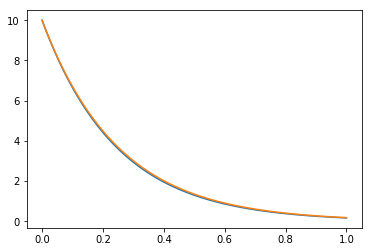

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import *

def fth(t):
    return 10*exp(-4*t)

yth = [fth(i) for i in t]
plt.plot(t,y)
plt.plot(t,yth)

On peut voir l'influence du *pas* en résolvant l'équation différentielle avec des pas différents :

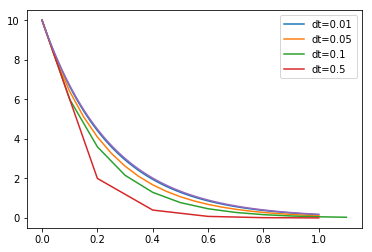

In [62]:
t1,y1=euler(f,10,0.01,1)
t2,y2=euler(f,10,0.05,1)
t3,y3=euler(f,10,0.1,1)
t4,y4=euler(f,10,0.2,1)
plt.plot(t1,y1,label="dt=0.01")
plt.plot(t2,y2,label="dt=0.05")
plt.plot(t3,y3,label="dt=0.1")
plt.plot(t4,y4,label="dt=0.5")
plt.plot(t,yth)
plt.legend()

Il est clair que plus le pas est petit, plus la solution numérique est proche de la solution exacte.

On peut également évaluer la complexité en temps de cet algorithme. La boucle principale de la fonction `euler` est executée autant de fois qu'il y a de points à calculer dans l'intervalle $[0-t_{max}]$. Soit pour un pas de $dt$ la boucle s'exécute $N=\frac{t_{max}}{dt}$ fois. Donc plus $dt$ est faible plus le temps d'exécution du programme est grand. On ne peut donc pas choisir un pas arbitrairement petit. Il faut trouver le bon compromis entre précision de la solution et temps de calcul acceptable.

> #### Exercice
> 
> Comment modifier la fonction `euler` ci-dessus pour résoudre une équation différentielle d'ordre 2

<a id='pivotgauss'></a>
### Résolution d'un système linéaire, méthode de Gauss

Pour le détail de l'algorithme du pivot de Gauss, voir le [cours de maths](http://alicenolot.free.fr/cours/chapitre12.pdf) (Chapitre 12 II-2). 

La traduction en python de l'algorithme est donnée ci-dessous.

In [63]:
def pivot(A,k):
    """ Fonction qui détermine le pivot dans la colonne k
    de la matrice A. Elle renvoit la ligne du premier 
    élément non nul de la colonne k """
    n=len(A)
    for i in range(k,n):
        if(A[i][k]!=0):
            return i
    print("Erreur, pas de pivot trouvé")

def echange(A,i,j):
    """ Échange les lignes i et j de la matrice A """
    v=A[i]
    A[i]=A[j]
    A[j]=v

def transvection(A,i,j,lam):
    """ Modifie la matrice A en ajoutant à la ligne i 
    lam fois la ligne j """
    for k in range(len(A[0])):
        A[i][k]+=lam*A[j][k]
        
def resoudre(A,B):
    """ Résout le système linéaire AX=B """
    n = len(A[0])
    # Matrice A sous forme échelonnée
    for i in range(n-1):
        p = pivot(A,i)
        echange(A,p,i)
        echange(B,p,i)
        for k in range(i+1,n):
            transvection(A,k,p,-A[k][i]/A[i][i])
            transvection(B,k,p,-A[k][i]/A[i][i])
    
    # Matrice A sous forme échelonnée réduite
    for i in range(1,n+1):
        B[n-i][0] = B[n-i][0]/A[n-i][n-i]
        A[n-i][n-i] = 1
        for k in range(n-i):
            transvection(B,k,n-i,-A[k][n-i]/A[n-i][n-i])
            transvection(A,k,n-i,-A[k][n-i]/A[n-i][n-i])
    return A,B  
    
# Exemple d'application
A=[[1,2,3],
   [0,5,6],
   [0,0,10]]

B=[[1],[1],[1]]

resoudre(A,B)        

([[1, 0.0, 0.0], [0.0, 1, 0.0], [0.0, 0.0, 1]],
 [[0.54], [0.07999999999999999], [0.1]])

<a id='integderiv'></a>
### Intégration et dérivation numérique

Il arrive souvent que l'on souhaite obtenir numériquement la fonction dérivée ou l'intégrale (primitive) d'une fonction $f(x)$.

Le plus souvent c'est parce que la fonction $f(x)$ n'est connue que numériquement, c'est à dire que l'on n'en connait qu'un nombre fini de valeurs ${f(x_1), f(x_2),\ldots, f(x_n)}$. Il peut également arriver que la primitive $F(x)$ de la fonction $f(x)$ soit très difficile à calculer. (Pour un physicien, une primitive devient vite difficile à calculer) 

- [Dérivation numérique](#derivation)
- [Intégration numérique](#Integration)



<a id='derivation'></a>
#### Dérivation numérique

La dérivation numérique d'une fonction $f(x)$ repose sur la définition du nombre dérivé en $x_0$ :

$$ f'(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h} $$

On se contente alors de prendre une valeur de $h$ *suffisamment* petite et on écrit :

$$ f'(x_0) \simeq \frac{f(x_0+h)-f(x_0)}{h} $$

On pourra donc utiliser la fonction Python suivante :

In [64]:
def derivee(f,x0):
    h=1e-4
    return (f(x0+h)-f(x0))/h

Testons cette méthode avec une fonction mathématique dont la dérivée est connue :
$$ f(x) = \cos(x) \quad f'(x) = -\sin(x) $$

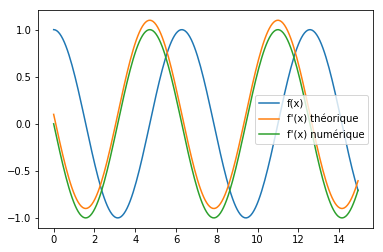

In [65]:
from math import *
from matplotlib import pyplot as plt

def f(x):
    return cos(x)

def fp(x):
    return -sin(x)

xVals=[]
yVals=[]
ypTheoVals=[]
ypNumVals=[]
xmin = 0
xmax = 15
for i in range(200):
    x=xmin + i*(xmax-xmin)/200
    xVals.append(x)
    yVals.append(f(x))
    ypTheoVals.append(fp(x)+0.1)
    ypNumVals.append(derivee(f,x))
    
plt.plot(xVals,yVals,label="f(x)")
plt.plot(xVals,ypTheoVals,label="f'(x) théorique")
plt.plot(xVals,ypNumVals,label="f'(x) numérique")
plt.legend()
plt.show()

<a id='Integration'></a>
#### Intégration numérique

L'intégration numérique est un peu plus compliquée que la dérivation. On utilise le fait que l'intégrale $\int_a^b f(x) dx$ est égale à l'aire sous la courbe représentative de $f(x)$ entre $a$ et $b$. Il faut donc calculer numériquement cette aire.

##### Méthode des rectangles
La méthode la plus simple est la méthode des rectangles qui consiste à approximer la fonction par une série de rectangles de largeur $p$ et de surface $S_i$:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Integration_num_rectangles_notation.svg/668px-Integration_num_rectangles_notation.svg.png" alt="Méthode des rectangles" style="width: 400px; margin:auto"/>

Cette méthode est mise en oeuvre dans la fonction python suivante :

In [66]:
def integRectangles(f,a,b,n):
    """Intègre la fonction f entre a et b par la méthode des rectangles
    en utilisant n rectangles """
    p = (b-a)/n
    S=0
    for i in range(n):
        xi = a+p/2+i*p
        Si = f(xi)*p
        S += Si
    return S

Testons cette fonction pour calculer la primitive d'une fonction connue :
$$ f(x) = \cos(x) \quad F(x) = \sin(x) $$

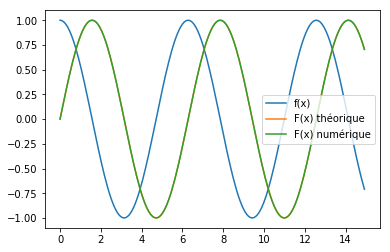

In [67]:
def f(x):
    return cos(x)

def F(x):
    return sin(x)

xVals=[]
yVals=[]
YTheoVals=[]
YNumVals=[]
xmin = 0
xmax = 15
for i in range(200):
    x=xmin + i*(xmax-xmin)/200
    xVals.append(x)
    yVals.append(f(x))
    YTheoVals.append(F(x))
    YNumVals.append(integRectangles(f,0,x,200))
    
plt.plot(xVals,yVals,label="f(x)")
plt.plot(xVals,YTheoVals,label="F(x) théorique")
plt.plot(xVals,YNumVals,label="F(x) numérique")
plt.legend()
plt.show()

La manière utilisée ci-dessus pour calculer la primitive de la fonction est très peu efficace. Expliquer pourquoi et expliquer comment ou pourrait rendre ce calcul beaucoup plus efficace.

Séparer l'intervalle d'intégration en $n$ rectangles, avec $n$ fixé *a priori* n'est pas forcément la méthode la plus efficace en moyenne. En effet pour une fonction qui varie *lentement*, le nombre de rectangles nécessaire sera plus faible que pour une fonction qui varie plus rapidement. 

On pourra donc écrire une nouvelle fonction qui adapte le nombre de rectangles jusqu'à ce que le résultat de l'intégrale ne varie plus :

In [68]:
def integRectanglesAdapt(f,a,b):
    diff=10
    n=10
    eps=1e-5
    integ = integRectangles(f,a,b,n)
    while(abs(diff)>eps):
        prec = integ
        n = 2*n
        integ = integRectangles(f,a,b,n)
        diff = integ-prec
    return integ

integRectanglesAdapt(f,0,pi/2)

1.0000010039887828

##### Méthode des trapèzes
On peut également modéliser la fonction à intégrer par une série de segments de droite. Il s'agit de la méthode des trapèzes

![trapèzes](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Integration_num_trapezes_notation.svg/220px-Integration_num_trapezes_notation.svg.png)

L'aire d'un trapèze est donnée par :
$$S_i = p\frac{f(x_i)+f(x_{i+1})}{2}$$

La fonction python suivante met en oeuvre la méthode des trapèzes :

## Bases de données